In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import trange
import matplotlib.pyplot as plt
%matplotlib inline

months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [2]:
def ui(y_true, y_pred):
    numerator = np.sum(((y_true - y_pred) ** 2)[:, 1:])
    denominator = np.sum((y_true[:, 1:] - y_true[:, :-1]) ** 2)
    return np.sqrt(numerator / denominator)

In [3]:
def arvi(y_true, y_pred):
    numerator = np.sum(((y_true - y_pred) ** 2)[:, 1:])
    ave = np.mean(y_true, axis=1)
    denominator = np.sum(((y_true[0] - ave[0]) ** 2 + (y_true[1] - ave[1]) ** 2)[1:])
    return numerator / denominator

In [4]:
data_set = 'London_2013'

path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))

attr = pd.read_csv(os.path.join(path, 'data', f'{data_set}_attr_final.csv'))
data = []
for i in trange(len(attr)):
    id = attr['ID'][i]
    df = pd.read_csv(os.path.join(path, 'data', f'{data_set}_monthly_interval', f'{id}.csv'), header = None).values
    data.append(df)
data = np.array(data)

100%|██████████| 2002/2002 [01:07<00:00, 31.09it/s]


In [5]:
month = 5
n_clusters = 5
method = 'kmeans'

path_cluster = os.path.join(path, 'result', data_set, 'clustering', 'interval', method, f'n_clusters_{n_clusters}.csv')
clusters = pd.read_csv(path_cluster, header=None)

series = data[:, (month-1)*2:month*2, :months[month-1]*24]

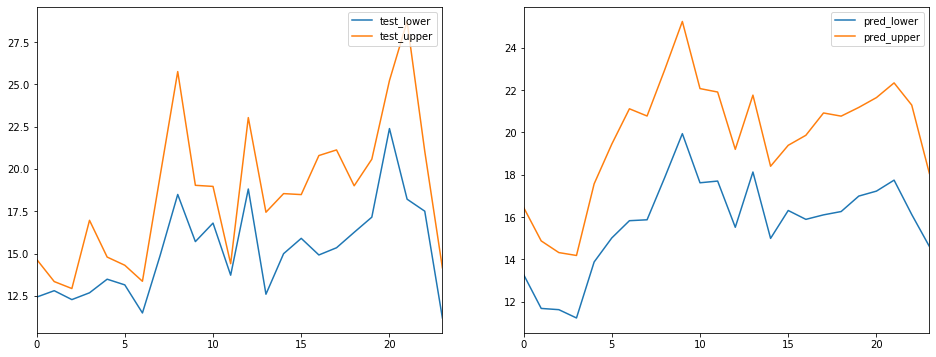

In [21]:
times = 2
algor = 'imlp'
i = 3

index = list(clusters[month-1] == i)
sub_series = series[index]
sub_series = np.sum(sub_series, axis=0)

train = sub_series[:, :-168]
test = sub_series[:, -168:]

scale = np.zeros(2)
scale[0] = np.max(train)
scale[1] = np.min(train)

path_result = os.path.join(path, 'result', data_set, 'forecasting', algor, f'times_{times}', method)
pred_series = np.load(os.path.join(path_result, f'n_clusters_{n_clusters}_month_{month}.npy'))[i]

pred_series = pred_series * (scale[0] - scale[1]) + scale[1]

day = 1  # day = 1, 2, ..., 7
plt.figure(figsize=(16, 6))
p1 = plt.subplot(1, 2, 1)
p1.plot(test[0][(day-1)*24:day*24])
p1.plot(test[1][(day-1)*24:day*24])
plt.xlim((0, 23))
plt.legend(['test_lower', 'test_upper'], loc='upper right')

p2 = plt.subplot(1, 2, 2)
p2.plot(pred_series[0][(day-1)*24:day*24])
p2.plot(pred_series[1][(day-1)*24:day*24])
plt.xlim((0, 23))
plt.legend(['pred_lower', 'pred_upper'], loc='upper right')

In [32]:
arvi(test, pred_series)

0.051472420230288245

In [33]:
ui(test, pred_series)

0.5312570377796716

## Plot series on a day

meter ID: MAC000149(20130101), 2835(20100701)

([<matplotlib.axis.XTick at 0x11f038ef0>,
 <a list of 24 Text xticklabel objects>)

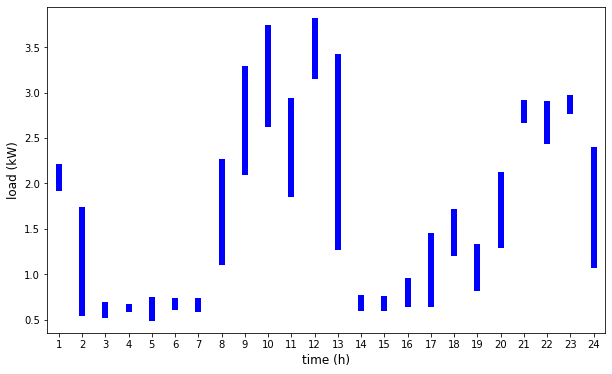

In [10]:
# data = pd.read_csv('/Users/kaishuai/Desktop/ProbabilisticLoadForecasting/data/London_2013_monthly_interval/MAC000149.csv', header=None)
data = pd.read_csv('/Users/kaishuai/Desktop/ProbabilisticLoadForecasting/data/Irish_2010_monthly_interval/2835.csv', header=None)

# t = data.values[0:2][:24]
t = data.values[6:8][:24]

plt.figure(figsize=(10, 6))

for i in range(24):
    plt.plot([i+1, i+1], [t[0, i], t[1, i]], color='blue', linewidth=6)

# font={'size':12}
plt.xlabel('time (h)')
plt.ylabel('load (kW)')
plt.xlim((0.5, 24.5))
new_ticks = np.arange(24) + 1
plt.xticks(new_ticks)

# plt.savefig('MAC000149(20130101).svg', bbox_inches='tight', pad_inches=0)
plt.savefig('2835(20100701).svg', bbox_inches='tight', pad_inches=0)

## Plot series on one month

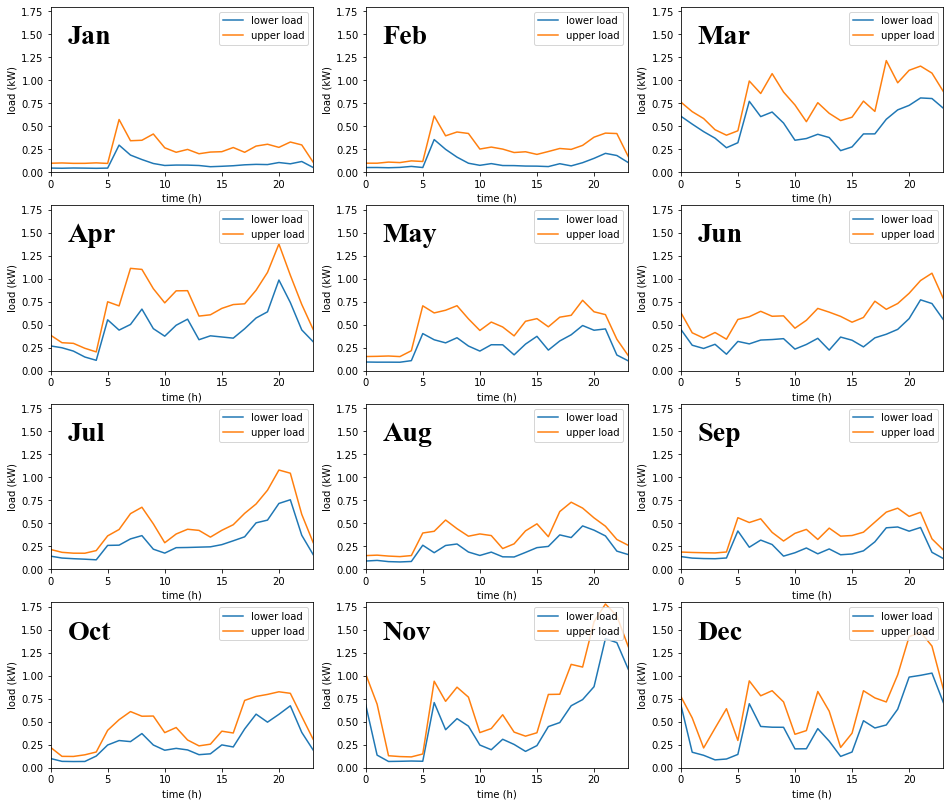

In [36]:
data = pd.read_csv('/Users/kaishuai/Desktop/ProbabilisticLoadForecasting/data/London_2013_profiles_interval/MAC003281.csv', header=None).values
# data = pd.read_csv('/Users/kaishuai/Desktop/ProbabilisticLoadForecasting/data/Irish_2010_profiles_interval/2835.csv', header=None).values

mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(16, 14))
for m in range(1, 13):
    t = data[2*(m-1):2*m]
    
    plt.subplot(4, 3, m)
    plt.plot(t[0], label='lower load')
    plt.plot(t[1], label='upper load')

    plt.xlabel('time (h)')
    plt.ylabel('load (kW)')
#     plt.ylim((0, 8))
    plt.ylim((0, 1.8))
    plt.xlim((0, 23))
    plt.legend(loc='upper right')
#     plt.text(1.5, 6.5, mon[m-1],
#              fontdict={'size': 28, 'family': 'Times New Roman', 'color': 'black'})
    
    plt.text(1.5, 1.4, mon[m-1],
             fontdict={'size': 28, 'family': 'Times New Roman', 'color': 'black'})
    
plt.savefig('MAC0003281.svg', bbox_inches='tight', pad_inches=0)
# plt.savefig('2835.svg', bbox_inches='tight', pad_inches=0)